# 1. Introduction

We are given a dataset with 79 explanatory variables describing various aspects of resdidential homes in Ames, Iowa. Our goal is to predict the final price of each home.


# 2. Importing and exploring data

### 2.1 Loading required libraries

In [98]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics


color = sns.color_palette()
sns.set_style('darkgrid')


import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning from sklearn and seaborn

In [99]:
# loading data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### 2.2 Data structure

In [100]:
train.shape  # 1460 observations in train set


(1460, 81)

In [101]:
test.shape # 1459 observations in test set

(1459, 80)

In [102]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [103]:
#Saving "Id" columns for later use
train_Id_index=train.Id
test_Id_index=test.Id

In [104]:
train=train.drop(['Id'],axis=1) 
test=test.drop(['Id'],axis=1)

# 3. Investigating some of the most important variables

### 3.1 Sale Price    


In [105]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


 mu = 180921.20 and sigma = 79415.29



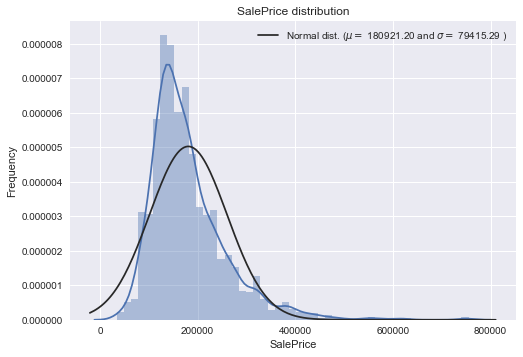

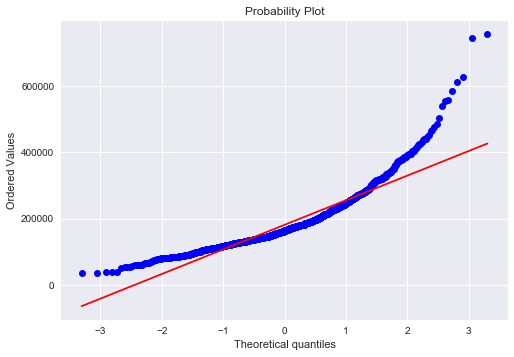

In [106]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

Sale price column is very right skewed. It makes sense as few people can afford expensive houses.
I am going to tranform this variable and make it more normally distributted.


 mu = 12.02 and sigma = 0.40



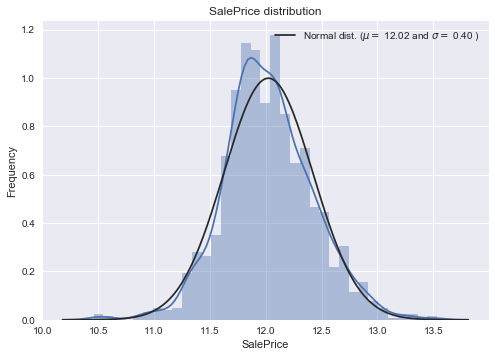

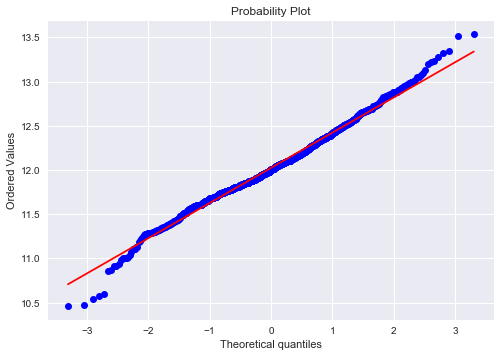

In [107]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

The skew seems now corrected and the data appears more normally distributed.

To start analyzing data, I need to concatenate train and test set.

In [108]:
ntrain = train.shape[0]
ntest = test.shape[0]
#y_train=train.SalePrice.values
df = pd.concat((train, test)).reset_index(drop=True)
#df.drop(['SalePrice'], axis=1, inplace=True)
print("dataframe size is : {}".format(df.shape))

dataframe size is : (2919, 80)


### 3.2 corelation with sale price

Here I am going to find out which variables have a strong corelation with the target variable, sale price.
First step is to find numeric columns.

In [109]:
numeric_columns=df.select_dtypes(include=[np.number]).columns.tolist() # All numeric columns

In [110]:
corr=df[numeric_columns].corr()
corr=corr[abs(corr['SalePrice'])>.5] # All correlation above 0.5

## Extracting rows name with correlation above 0.5 
row_index=[]
for index, row in corr.iterrows():
    row_index.append(index)


In [111]:
corr=corr[row_index] # Correlation matrix for variables that have a correlation of 0.5 and higher with Sale Price
corr

,1stFlrSF,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,OverallQual,SalePrice,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd
1stFlrSF,1.000000,0.373077,0.492011,0.440540,0.260450,0.562538,0.479152,0.596981,0.391782,0.801670,0.310814,0.242245
FullBath,0.373077,1.000000,0.408487,0.479988,0.495688,0.630286,0.528483,0.594771,0.527337,0.327762,0.471169,0.457980
GarageArea,0.492011,0.408487,1.000000,0.889700,0.555836,0.485469,0.565122,0.650888,0.328687,0.486067,0.480735,0.376765
GarageCars,0.440540,0.479988,0.889700,1.000000,0.587712,0.489933,0.600744,0.680625,0.358053,0.437997,0.538074,0.426022
GarageYrBlt,0.260450,0.495688,0.555836,0.587712,1.000000,0.273411,0.571803,0.541073,0.162684,0.348408,0.834812,0.652365
GrLivArea,0.562538,0.630286,0.485469,0.489933,0.273411,1.000000,0.575126,0.700927,0.808354,0.445276,0.242666,0.316972
OverallQual,0.479152,0.528483,0.565122,0.600744,0.571803,0.575126,1.000000,0.817185,0.389761,0.549294,0.597554,0.571532
SalePrice,0.596981,0.594771,0.650888,0.680625,0.541073,0.700927,0.817185,1.000000,0.534422,0.612134,0.586570,0.565608
TotRmsAbvGrd,0.391782,0.527337,0.328687,0.358053,0.162684,0.808354,0.389761,0.534422,1.000000,0.282126,0.114280,0.198250
TotalBsmtSF,0.801670,0.327762,0.486067,0.437997,0.348408,0.445276,0.549294,0.612134,0.282126,1.000000,0.408515,0.298107


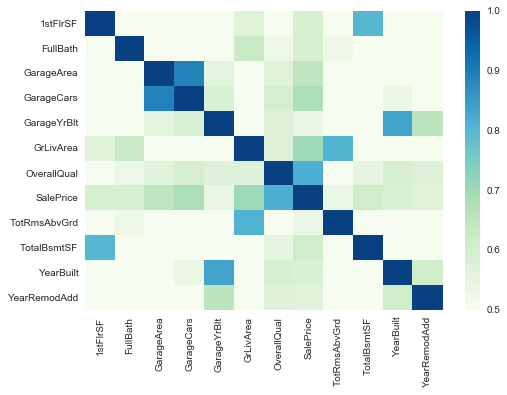

In [112]:
sns.heatmap(corr,cmap='GnBu',vmin=.5,vmax=1)
plt.show()

Here, I will show the relation between SalePrice and the teo variables with the highest correlation with SalePrice by way of vissulization. The two variables are Overall Quality and the ‘Above Grade’ Living Area.

It is worth mentioning that some variables show a strong correlation, such as the correlation between GarageCars and GarageArea (0.89), and both have a high correlation with SalePrice.

Also, 6 other variables have a high correlation with SalePrice: 
* TotalBsmtSF: Total square feet of basement area 
* 1stFlrSF: First Floor square feet 
* FullBath: Full bathrooms above grade 
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) 
* YearBuilt: Original construction date 
* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

### 3.3 Overall Quality

This variable has the highest correlation with SalePrice (0.79). It represents the overall material and finish of the house on a scale from 1 (very poor) to 10 (very excellent).

In [113]:
# The code below aggregate sale price values based on corresponding overall quality
saleprice=[]
for qual in range(1,11):
    saleprice.append(train[train['OverallQual']==qual].SalePrice.tolist())


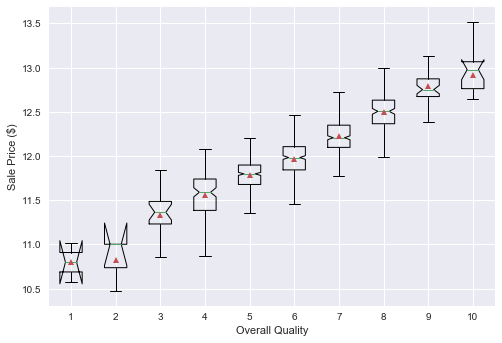

In [114]:
# Plotting boxplot of sale price for different overall quality values
plt.boxplot(saleprice,positions=[1,2,3,4,5,6,7,8,9,10],showmeans=True,notch=True,showfliers=True)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price ($)')
plt.show()

From the box plot it seems that there is no extreme value regarding outliers. 



### 3.4 Above Grade (Ground) Living Area (sf)
Above Grade living area has the second highest correlation with sale price. Here I made a visulization to show the relationship between the two columns.

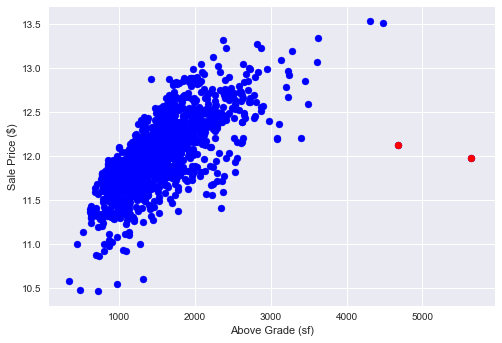

In [115]:
#marker_on=train['GrLivArea']
plt.scatter(train['GrLivArea'],train['SalePrice'],c='b')
plt.scatter(x=[4676,5648],y=[np.log1p(184750),np.log1p(160000)],c='r')
plt.xlabel('Above Grade (sf)')
plt.ylabel('Sale Price ($)')
plt.show()

In [116]:
train[train['GrLivArea']>4500][['GrLivArea','SalePrice']]

,GrLivArea,SalePrice
523,4676,12.126764
1298,5642,11.982935


The general trend looks good. If the area goes up, the sale price will go up as well. There are two houses (red dots) which do not follow the general trend and can be candidates for outliers. I am going to remove these two from the dataframe.

In [117]:
df.drop(df.index[[523,1298]],inplace=True)


In [118]:
#ntrain = ntrain-2
#ntest = test.shape[0]
#df = pd.concat((train, test)).reset_index(drop=True)

# 4. Dealing with missing values
As you can see there are many columns and it seems overwhelming to extract usefull features. First, I am going to find out how many null values there are in the dataset.

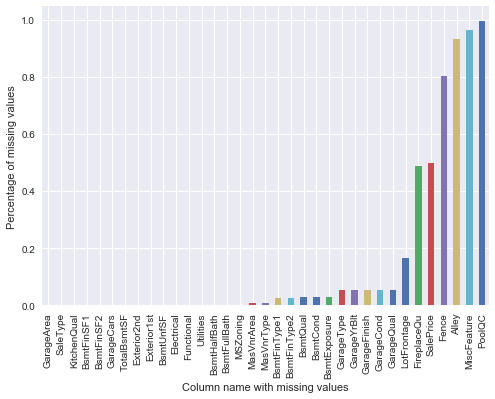

In [119]:
missing = df.isnull().sum()
missing = missing[missing > 0]/(df.shape[0])
missing.sort_values(inplace=True)
missing.plot.bar()
plt.xlabel('Column name with missing values')
plt.ylabel('Percentage of missing values')
plt.show()


There are 19 columns with missing values which need to be further explored. Five columns have more than 20% missing values which are PoolQC, 
MiscFeature, Alley, Fence and FireplaceQu.


## 4.1 PoolQc column
This column has the most NA values. According to the description file, NA is assigned to the houses without a pool. There are five categories
for Pool quality (Ex, Gd, TA, Fa, Po, and NA). I assign 'None' to the missing values. 


In [120]:
df['PoolQC']=df['PoolQC'].fillna('None')


## 4.2 Miscfeature column
This column has 2814 null values. According to the description file, None is assigned to the houses without a Miscellaneous feature. 

In [121]:
df['MiscFeature']=df['MiscFeature'].fillna('None')

## 4.3 Alley column
This column has 2721 null values. According to the description file, NA is assigned to the houses without an access to alley. There are two categories for alley  plus NA. I assign 'None' to NAs.

In [122]:
df['Alley']=df['Alley'].fillna('None')

## 4.4 Fence column
This column has 2348 null values. 

In [123]:
df['Fence']=df['Fence'].fillna('None')

## 4.5 Fireplace columns

**FireplaceQu**     
This column has 1420 null values. 

In [124]:
df['FireplaceQu']=df['FireplaceQu'].fillna('None')

**Fireplaces**: The values are integers and there is no missing value.

## 4.6 Lot related columns
There 3 variables in total. one of them with NAs and two without NAs.

**LotFrontage**

This column has 486 null values.  LotFrontage is defined as Linear feet of street connected to property. Plotting LotFrontage versus Neighborhood shows that  the distribution of LotFrontage varies acrros different neiborhoods. A good way to fill the missing values would be replacing them by the median for each neiborhood. The code below does this for us.

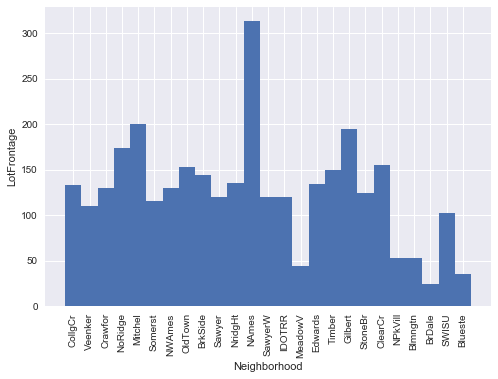

In [125]:
plt.bar( df['Neighborhood'],df['LotFrontage'],1)
plt.xlabel('Neighborhood')
plt.xticks(rotation='vertical')
plt.ylabel('LotFrontage')
plt.show()


In [126]:
# Group by LotFrontage by Neighborhood and filling NaN with the median of each Neighborhood using transform method
df['LotFrontage']=df.LotFrontage.fillna(df.groupby('Neighborhood').LotFrontage.transform(lambda x: x.fillna(x.median())))

**LotShape**
This column describes the shape of a lot. 

**LotConfig**
There is no missing value in this column.

## 4.7 Garage related columns

There are 7 columns related to Garage with missing values. Two of those have one NA (GarageCars and GarageArea), one has 157 NAs (GarageType), 4 variables (GarageYrBlt, GarageFinish, GarageQual, and GarageCond) have 159 NAs.

** Garage Year Built**
Here, we replace all 159 missing values with YearBuilt as it makes sense to assume that the house year built should be the same as the year the garage is built.

In [127]:
df['GarageYrBlt'].isnull().sum()

159

In [128]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['YearBuilt'])

We need to find out why there are 159 NAs in GarageFinish, GarageQual, and GarageCond while there are 157 NAs in GarageType. Let's find those two houses.

In [129]:
#index for null values
GarageCond_null_index=df[df['GarageCond'].isnull()].index.tolist()
GarageQual_null_index=df[df['GarageQual'].isnull()].index.tolist()
GarageFinish_null_index=df[df['GarageFinish'].isnull()].index.tolist()
GarageType_null_index=df[df['GarageType'].isnull()].index.tolist()

In [130]:
# this retuen an empty list for all Garage columns which means the differences are in the dataframe.
list(set(GarageQual_null_index) - set(GarageType_null_index))

[2576, 2126]

So, we should look into these two rows. It seems that 2576 has a Garage but 2126 does not have a Garage as almost everything is NAs. So for 2126 we set the NA to the most occured value while we set NA to no Garage for 2576.


In [131]:
Garage_related=['GarageCars','GarageArea','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']

In [132]:
df['GarageFinish'].iloc[2126]=df['GarageFinish'].mode()[0]
df['GarageQual'].iloc[2126]=df['GarageQual'].mode()[0]
df['GarageCond'].iloc[2126]=df['GarageCond'].mode()[0]

In [133]:
df['GarageFinish'].iloc[2576]=np.nan
df['GarageType'].iloc[2576]=np.nan
df['GarageQual'].iloc[2576]=np.nan
df['GarageCond'].iloc[2576]=np.nan
df['GarageArea'].iloc[2576]=0
df['GarageCars'].iloc[2576]=0

**Garage Type** 

In [134]:
df['GarageType']=df['GarageType'].fillna('None')

**Garage Finish** 

In [135]:
df['GarageFinish']=df['GarageFinish'].fillna('None')

**Garage Quality and Garage Condition** 

In [136]:
df['GarageQual']=df['GarageQual'].fillna('None')
df['GarageCond']=df['GarageCond'].fillna('None')

**Garage Area** and **Garage Cars**

In [137]:
df['GarageArea']=df['GarageArea'].fillna(df['GarageArea'].median())
df['GarageCars']=df['GarageCars'].fillna(df['GarageCars'].median())

## 4.8 MS Zoning column


In [138]:
df['MSZoning'].isnull().sum()

4

In [139]:
df['MSZoning']=df['MSZoning'].fillna(df['MSZoning'].mode()[0])

## 4.9 Basement related  columns

There are 11 columns related to the basemnet of a house.  5 columns (BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2) have 79-80 NAs while the rest have 1 or 2 NAs. for the columns with +79 NAs, I find the index of the NA columns and I fill the difference with mode.

In [140]:
BsmtQual_null_index=df[df['BsmtQual'].isnull()].index.tolist() #79 NAs
BsmtCond_null_index=df[df['BsmtCond'].isnull()].index.tolist()  #79 NAs 
BsmtExposure_null_index=df[df['BsmtExposure'].isnull()].index.tolist() #80 NAs -->948
BsmtFinType1_null_index=df[df['BsmtFinType1'].isnull()].index.tolist() #79 NAs
BsmtFinType2_null_index=df[df['BsmtFinType2'].isnull()].index.tolist() #80 NAs -->332

In [141]:
df['BsmtExposure'].iloc[948]=df['BsmtExposure'].mode()[0]
df['BsmtFinType2'].iloc[332]=df['BsmtFinType2'].mode()[0]

**BsmtQual and BsmtCond**

In [142]:
df['BsmtQual']=df['BsmtQual'].fillna('None')
df['BsmtCond']=df['BsmtCond'].fillna('None')

**BsmtExposure**

In [143]:
df['BsmtExposure']=df['BsmtExposure'].fillna('None')

**BsmtFinType1 and BsmtFinType2**

In [144]:
df['BsmtFinType1']=df['BsmtFinType1'].fillna('None')
df['BsmtFinType2']=df['BsmtFinType2'].fillna('None')

For the rest of Basement related columns with 1 or 2 NAs, we set them to 0 as there is no basement in the house.

In [145]:
df['BsmtFullBath']=df['BsmtFullBath'].fillna(0)
df['BsmtHalfBath']=df['BsmtHalfBath'].fillna(0)
df['BsmtFinSF1']=df['BsmtFinSF1'].fillna(0)
df['BsmtFinSF2']=df['BsmtFinSF2'].fillna(0)
df['BsmtUnfSF']=df['BsmtUnfSF'].fillna(0)
df['TotalBsmtSF']=df['TotalBsmtSF'].fillna(0)

## 4.10 Masonry type and Masonry area  columns

There are 24 NAs in Masonry type and 23 NAs in Masonry area. for the one difference I use mode to fill the NA. if a house has Masonry area it shoul have Masonry type as well. I am going to find the index of this difference and I use mode to fill that row for Masonry type.


In [146]:
MasVnrType_null_index=df[df['MasVnrType'].isnull()].index.tolist() #24 NAs 
MasVnrArea_null_index=df[df['MasVnrArea'].isnull()].index.tolist() #23 NAs

In [147]:
list(set(MasVnrType_null_index) - set(MasVnrArea_null_index))

[2610]

In [148]:
df['MasVnrType'].iloc[2610]=df['MasVnrType'].mode()[0]

Now, Masonry Area with NAs should be 0 as there is no Masonry type. 

In [149]:
df['MasVnrArea']=df['MasVnrArea'].fillna(0)

In [150]:
df['MasVnrType']=df['MasVnrType'].fillna('None')

## 4.11 Kitchen related columns

**KitchenQual**

There is only one NA in kitchen quality. 

In [151]:
df['KitchenQual']=df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

**Kitchen** 
It is defined as number of Kitchens above grade. Values are numeric so I leave them as is.

## 4.12 Utilities

In [152]:
train['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [153]:
test['Utilities'].unique()

array(['AllPub', nan], dtype=object)

All rows in this column in test set are 'AllPub' with one NA. So it is a good idea to drop this column as it would not affect our prediction.

In [154]:
df.drop(['Utilities'],axis=1,inplace=True)

## 4.13 Home functionality
Data description says NA means typical.

In [155]:
df['Functional'].isnull().sum()

2

In [156]:
df["Functional"] = df["Functional"].fillna("Typ")

## 4.14 Exterior related columns
**ExteriorCond** and **ExteriorQual** have no NA. 

There is 1 NA in Exterior1nd test set and 1 NA in Exterior2nd test set. I replace them with mode. 

In [157]:
df['Exterior2nd']=df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['Exterior1st']=df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])

## 4.15 Electrical  column
There is 1 NA. I replace it with mode. 

In [158]:
df['Electrical'].isnull().sum()

1

In [159]:
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

## 4.16 SaleType

**Type of sale**
There is 1 NA. I replace it with mode. 

In [160]:
df['SaleType'].isnull().sum()

1

In [161]:
df['SaleType']=df['SaleType'].fillna(df['SaleType'].mode()[0])

**Sale Condition**

There is no NA. 

## 4.17 Sanity check

In [162]:
df.isnull().sum().sum()

1459

There is no missing value in the dataframe. The number above, 1459 refers to the Sale Price from the test after t of train and test sets.

# 5. Feature engineering

## 5.1 Transforming numeric values to categorical values
There are three variables that are given in form of numbers but they seem categorical. 

**Year and Month sold**        
In order to show this I am going to plot Sale Price versus Year Sold and Month Sold.


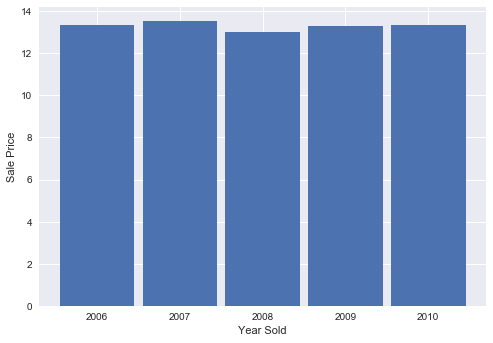

In [163]:
plt.bar( train['YrSold'],train['SalePrice'],.9)
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.show()

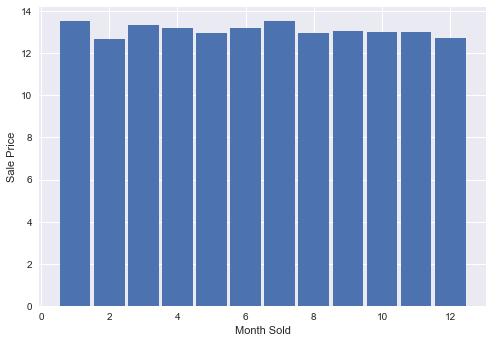

In [164]:
plt.bar( train['MoSold'],train['SalePrice'],.9)
plt.xlabel('Month Sold')
plt.ylabel('Sale Price')
plt.show()

As shown above, there is no trend for sale price between different months or years. It is better to transform these variables to categories.

In [165]:
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

**MSSubClass**
This variable identifies the type of dwelling involved in the sale. The values are reported as numbers but they look categorical.

20  1-STORY 1946 & NEWER ALL STYLES           
30  1-STORY 1945 & OLDER           
40  1-STORY W/FINISHED ATTIC ALL AGES           
45  1-1/2 STORY - UNFINISHED ALL AGES              
50  1-1/2 STORY FINISHED ALL AGES           
60  2-STORY 1946 & NEWER             
70  2-STORY 1945 & OLDER             
75  2-1/2 STORY ALL AGES                 
80  SPLIT OR MULTI-LEVEL            
85  SPLIT FOYER              
90  DUPLEX - ALL STYLES AND AGES             
120  1-STORY PUD (Planned Unit Development) - 1946 & NEWER               
150  1-1/2 STORY PUD - ALL AGES                
160  2-STORY PUD - 1946 & NEWER             
180  PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                
190  2 FAMILY CONVERSION - ALL STYLES AND AGES              

In [166]:
df['MSSubClass'] = df['MSSubClass'].astype(str)

## 5.2 Label encoding
Some of the varianles have some sort of ordering or have categorical values. Here I am going to the label encoding.

In [167]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

# shape        
print('Shape dataframe: {}'.format(df.shape))

Shape dataframe: (2917, 79)


## 5.3 Incorrect values
Some values can be obviously wrong and this might impact our model. I used min and max values to check odd values in the data

In [168]:
df.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,PoolQC,SalePrice,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,...,2917.000000,1458.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000
mean,1157.692492,335.861502,2.604045,0.985602,2.860130,3.673980,2.328420,438.864930,49.599246,3.183750,...,2.993486,12.024015,16.073363,0.995886,6.448063,1048.967775,93.629414,1971.287967,1984.248200,1.792938
std,385.264298,428.119663,25.196714,0.260180,0.822967,0.977272,1.151038,444.180542,169.232130,2.235724,...,0.126789,0.399713,56.202054,0.064018,1.564281,429.472008,126.532643,30.286991,20.892257,1.315328
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,10.460271,0.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,0.000000
25%,876.000000,0.000000,0.000000,1.000000,2.000000,4.000000,2.000000,0.000000,0.000000,2.000000,...,3.000000,11.774720,0.000000,1.000000,5.000000,793.000000,0.000000,1953.000000,1965.000000,1.000000
50%,1082.000000,0.000000,0.000000,1.000000,3.000000,4.000000,3.000000,368.000000,0.000000,2.000000,...,3.000000,12.001512,0.000000,1.000000,6.000000,988.000000,0.000000,1973.000000,1993.000000,2.000000
75%,1384.000000,704.000000,0.000000,1.000000,3.000000,4.000000,3.000000,733.000000,0.000000,6.000000,...,3.000000,12.273736,0.000000,1.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,3.000000
max,5095.000000,2065.000000,508.000000,2.000000,8.000000,4.000000,4.000000,4010.000000,1526.000000,6.000000,...,3.000000,13.534474,576.000000,1.000000,15.000000,5095.000000,1424.000000,2010.000000,2010.000000,4.000000


Looking at the min and max of each variable there are some errors in the data.

GarageYrBlt - the max value is 2207, this is obviously wrong since the data is only until 2010.
The rest of the data looks fine. Let's inspect this row a bit more carefully and impute an approximate correct value.

In [169]:
df[df['GarageYrBlt'] == 2207]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2592,1564,0,0,1,2,1Fam,4,0,583.0,0.0,...,NaN,New,0,1,6,1546.0,132,2006,2007,1


This particular datapoint has YearBuilt in 2006 and YearRemodAdd in 2007. 2207 most likely is a data input error that should have been 2007 when the remodel happened. Let's impute 2007.

In [170]:
df.loc[2592, 'GarageYrBlt'] = 2007

## 5.4 Skew transformation features
Let's check skew in our features and transform if necessary.

In [171]:
num_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num2 = []
for i in df.columns:
    if df[i].dtype in num_dtypes: 
        num2.append(i)

skew_col = df[num2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_col})
skews

,skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


I use the scipy function boxcox1p which computes the Box-Cox transformation. Note that still we have skews in our features.

In [172]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

high_skew = skew_col[skew_col > 0.5]
high_skew = high_skew
skew_index = high_skew.index

for i in skew_index:
    df[i]= boxcox1p(df[i], boxcox_normmax(df[i]+1))

        
skew_col2 = df[num2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews2 = pd.DataFrame({'skew':skew_col2})
skews2

,skew
PoolArea,15.595057
3SsnPorch,8.862045
LowQualFinSF,8.492615
MiscVal,5.237983
LandSlope,4.349145
BsmtHalfBath,3.779434
KitchenAbvGr,3.778336
ScreenPorch,3.152631
BsmtFinSF2,2.578329
EnclosedPorch,2.149133


## 5.5 Creating new features

**Bathroom**                    
one combined variable is the bathrooms in the house. I count fullbath for 1 and halfbath for 0.5.

FullBath           
HalfBath             
BsmtFullBath            
BsmtHalfBath            

In [173]:
df['Total_Bathrooms'] = (df['FullBath'] + (0.5*df['HalfBath']) + df['BsmtFullBath'] + (0.5*df['BsmtHalfBath']))


**Total square footage**

In [174]:
df['Total_sqr_footage'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] +df['1stFlrSF'] + df['2ndFlrSF'])


**Total porch size**

In [175]:
df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] +df['EnclosedPorch'] + df['ScreenPorch'] +df['WoodDeckSF'])

In [192]:
y_train=df['SalePrice'][:1458]


In [195]:
df.drop(['SalePrice'], axis=1, inplace=True)

In [196]:
df=pd.get_dummies(df)

In [197]:
df.shape

(2917, 222)

In [198]:
train=df[:ntrain-2]
test=df[ntrain-2:]

## 6. Modeling

### 6.1 Imorting libraries

In [231]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
#from sklearn import l as lgb

### 6.2 Define a cross validation function

I am going to use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, I add then one line of code, in order to shuffle the dataset prior to cross-validation.

In [232]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### 6.3 Base models         

**LASSO Regression :**        
Here, I use the sklearn's Robustscaler() method on pipeline since this model is sensetive to outliers.

In [233]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=5))

**Elastic Net Regression**: 

In [202]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

**Kernel Ridge Regression :**

In [203]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)


**Gradient Boosting Regression :**        
huber loss is included to makes sure the model is robust to outliers.

In [237]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

**XGBoost :**

In [239]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)


**LightGBM :**

In [240]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


### 6.4 Base models scores

Here, I am going to evaluate these models performance on the data by evaluating the cross-validation rmsle error.

In [242]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1090 (0.0071)



In [243]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1090 (0.0072)



In [244]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.2314 (0.0237)



In [245]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1164 (0.0079)



In [246]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1165 (0.0063)



In [247]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1157 (0.0064)



### 6.5 Stacking models

**Averaging base models**

I build a new class to extend scikit-learn with my model and also to laverage encapsulation and code reuse (inheritance)

**Averaged base models class**

In [248]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [249]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1187 (0.0092)



### 6.6 Ensembling StackedRegressor, XGBoost and LightGBM

We first define a rmsle evaluation function

In [210]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

**Final Training and Prediction**

Average stack:

In [277]:
averaged_models.fit(train.values, y_train)
average_train_pred = averaged_models.predict(train.values)
average_pred = np.expm1(averaged_models.predict(test.values))
print(rmsle(y_train, average_train_pred))

0.06455684732154623


XGBoost:

In [279]:
model_xgb.fit(train.values, y_train)
xgb_train_pred = model_xgb.predict(train.values)
xgb_pred = np.expm1(model_xgb.predict(test.values))
print(rmsle(y_train, xgb_train_pred))

0.07797434161319242


LightGBM:

In [280]:
model_lgb.fit(train.values, y_train)
lgb_train_pred = model_lgb.predict(train.values)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07299935293566757


In [298]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,average_train_pred*0.40 +
               xgb_train_pred*0.3 + lgb_train_pred*0.3 ))

RMSLE score on train data:
0.07320722532293027


In [292]:
ensemble = average_pred*0.4 + xgb_pred*0.3 + lgb_pred*0.3

In [293]:
sub = pd.DataFrame()
sub['Id'] = test_Id_index
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)